In [2]:
import cv2
import numpy as np
from skimage.filters import threshold_local
from skimage import measure
import imutils
import matplotlib.pyplot as plt
%matplotlib inline

## Methodology

This part of the project consist of applying image processing in order to facilitate the image segmentation work in the following steps. 
The preprocessing steps are:
1. Turn the image into grayscale
2. Apply Gaussian blur
3. Find vertical edges
4. Apply Otsu Thresholding
5. Apply Morphological Transformation

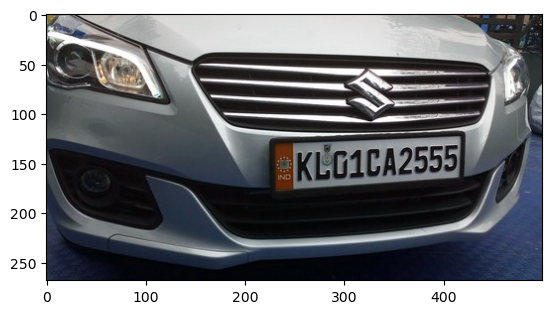

In [3]:
#Importing the original image
img = cv2.imread('plate_img.png')
plt.imshow(img)

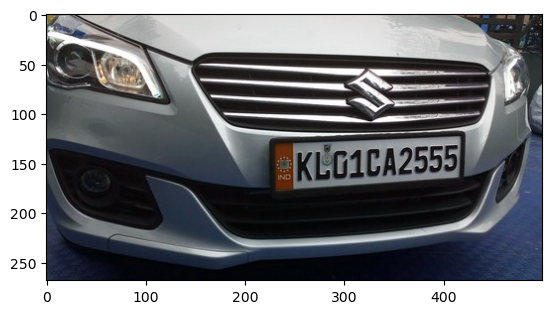

In [4]:
#Make a copy of the image for processing
img2 = img.copy()
plt.imshow(img2)

In [15]:
#Function to change image into grayscale
def grayscale(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

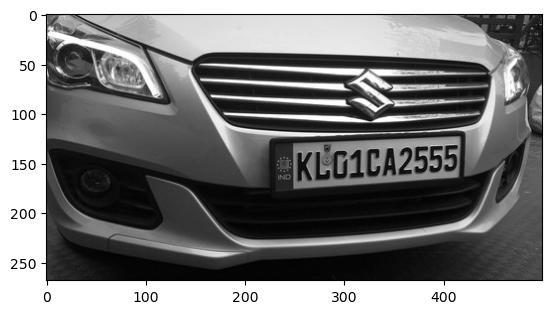

In [16]:
img_gray = grayscale(img2)
plt.imshow(img_gray, cmap='gray')

In [20]:
#Function to apply Gaussian blur
def bluring(img):
    blur = cv2.GaussianBlur(img, (7,7), 0)
    return blur

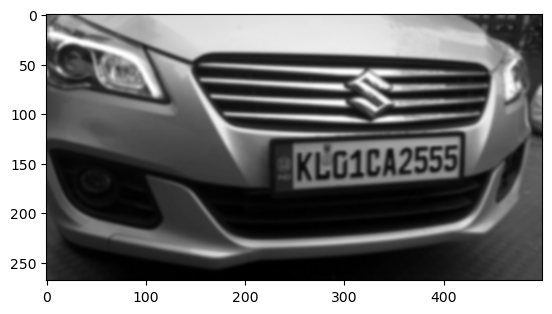

In [21]:
img_blur = bluring(img_gray)
plt.imshow(img_blur, cmap='gray')

In [8]:
#Function to detect vertical edges
def vert_edge(img):
    sobelx = cv2.Sobel(src = img, ddepth = cv2.CV_8U, dx=1, dy=0, ksize=3)
    return sobelx

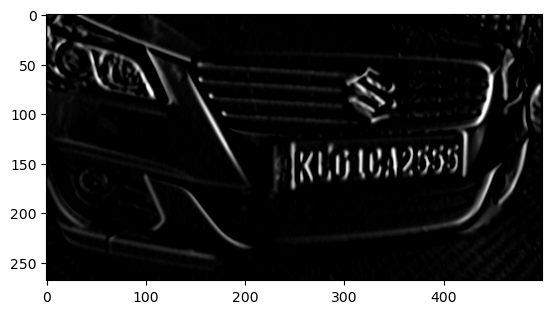

In [22]:
img_vert = vert_edge(img_blur)
plt.imshow(img_vert, cmap='gray')

In [26]:
#Function to apply Otsu Thresholding
def threshold(img):
    ret1, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th1

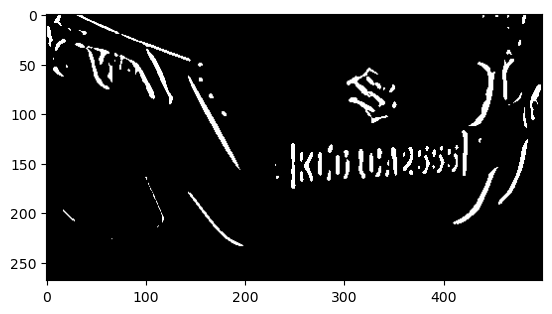

In [27]:
img_thresh = threshold(img_vert)
plt.imshow(img_thresh, cmap='gray')

In [47]:
#Function to apply Closing Morphological Transformation
def morph_transform(img):
    element = cv2.getStructuringElement(cv2.MORPH_RECT, ksize = (21,7))
    morph_img = img.copy()
    cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel=element, dst=morph_img)
    return morph_img

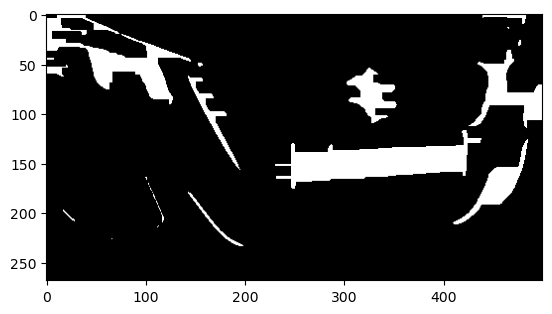

In [48]:
img_morph = morph_transform(img_thresh)
plt.imshow(img_morph, cmap='gray')

In [49]:
#Function to perform all proprocessing steps at once
def preprocess(img):
    #grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Gaussian blur
    blur = cv2.GaussianBlur(gray, (7,7), 0)
    
    #vertical edges
    sobelx = cv2.Sobel(src = blur, ddepth = cv2.CV_8U, dx=1, dy=0, ksize=3)
    
    #otsu_threshold
    ret1, th1 = cv2.threshold(sobelx, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    #closing morph
    element = cv2.getStructuringElement(cv2.MORPH_RECT, ksize = (21,7))
    morph_img = th1.copy()
    cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel=element, dst=morph_img)
    return morph_img

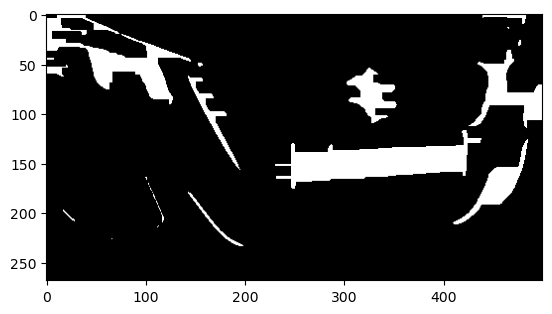

In [52]:
img_test = preprocess(img2)
plt.imshow(img_test, cmap='gray')